## Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

## Part 1 - MNIST

#### Load MNIST dataset

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
# Count the number of repetitions of a number
count_trainset = {k:0 for k in range(0,10)}
for k in y_train:
    count_trainset[k] = count_trainset[k] + 1
count_trainset

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

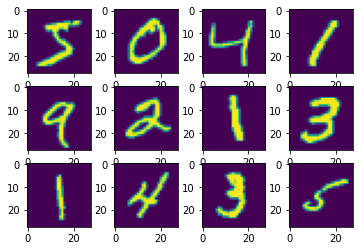

In [6]:
# Show the first 12 numbers
f,ax = plt.subplots(3,4)

counter = 0
for i in range(3):
    for j in range(4):
        ax[i][j].imshow(x_train[counter])
        counter += 1

#### Q1 - KNN

In [7]:
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)

In [8]:
# Execute KNN on the MNIST dataset
best_result = []
for k in range(1,11):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    r = accuracy_score(knn.predict(x_test), y_test)
    print(k , r)
    best_result.append(r)
print(max(best_result))   

1 0.9691
2 0.9627
3 0.9705
4 0.9682
5 0.9688
6 0.9677
7 0.9694
8 0.967
9 0.9659
10 0.9665
0.9705


In [13]:
try:
    if best_result_calculated:
        print("Already is calculated")
except:
    best_result = [[x] for x in best_result]
    
best_result_calculated = True

Already is calculated


In [14]:
d = {(k + 1):best_result[k] for k in range(0,10)}
d

{1: [0.9691],
 2: [0.9627],
 3: [0.9705],
 4: [0.9682],
 5: [0.9688],
 6: [0.9677],
 7: [0.9694],
 8: [0.967],
 9: [0.9659],
 10: [0.9665]}

<AxesSubplot:>

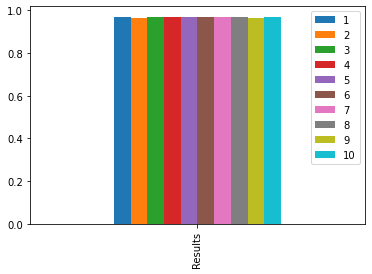

In [33]:
#pd.DataFrame.from_dict(d).plot(kind = 'bar')
pd.DataFrame(d, index=['Results']).plot(kind='bar')

#### Q2 - PCA

In [34]:
# Create PCA with 6 principle components
pca = PCA(6)

In [35]:
pca.fit(x_train)

PCA(n_components=6)

##### Q2 - a

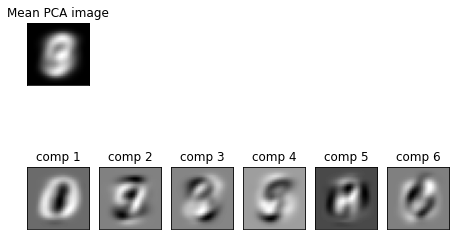

In [37]:
# Draw average number and the first 6 numbers
figure, plots = plt.subplots(2, 6, constrained_layout=True)
pca.explained_variance_

# computes the mean of the PCA
pcaMean = pca.mean_
# plots the mean image and below of it the first 6 principle components
for rowIndex in range(2):
    for colIndex in range(6):
        isPcaMean = rowIndex == 0 and colIndex == 0
        isPrincipleComponent = rowIndex == 1
        # sets the title and notReshapedIm
        if (isPcaMean):
                title = 'Mean PCA image'
                notReshapedIm = pcaMean
        elif (isPrincipleComponent):
            title = 'comp ' + str(colIndex + 1)
            notReshapedIm = pca.components_[colIndex]
        else:
            # hide the redundant subPlot
            plots[rowIndex, colIndex].set_visible(not plt.gcf().get_visible())
        # sets the title and show the plot in case of pcaMean or principleComponent
        if (isPcaMean or isPrincipleComponent):
            reshapedIm = notReshapedIm.reshape((28,28))
            plots[rowIndex, colIndex].set_title(title)
            fig = plots[rowIndex, colIndex].imshow(reshapedIm, cmap='gray')
            # removes the redundant axes from the subPlot
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
# displays the figure

##### Q2 - b

In [38]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

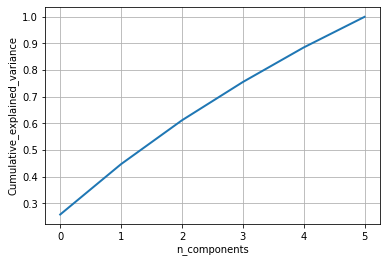

In [39]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

##### Q2 - c

In [41]:
# we want 95%=0.95 varianve, and after this 80%=0.8 variance
fractionsList = [0.95, 0.8] 
# gets the PCA  nComponents by the variance
for fraction in fractionsList:
    pca = PCA(fraction)
    pca.fit(x_train)
    percantage = str(fraction * 100)
    pcaNcomponents = str(pca.n_components_)
    print("for obtain " + percantage + "% variance, I need " + pcaNcomponents + " components")


for obtain 95.0% variance, I need 154 components
for obtain 80.0% variance, I need 44 components


##### Q2 - d

In [ ]:
TEN_COLORS_LIST = ['#fabebe', '#3cb44b', '#ffe119', '#f58231', '#4363d8', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#e6194b']

# computes the PCA given 2 nComponents
pca = PCA(n_components=2) 
# computes the xTrain after PCA fit transform
xTrainAfterFitTransform = pca.fit_transform(x_train)
# computes the xTest after PCA transform
xTestAfterTransform = pca.transform(x_test)
# computes numOfXtest
numOfXTest = len(xTestAfterTransform)
for index in range(numOfXTest):
    # prints each one of the clusters as a color
    plt.scatter(xTestAfterTransform[index][0], xTestAfterTransform[index][1], None, TEN_COLORS_LIST[y_test[index]])
# sets the axes labels
plt.xlabel('component num 1')
plt.ylabel('component num 2')
# displays the figure
plt.show()


##### Q2 - e

In [ ]:
def getScoreOfKnn(currentK, xTrain, yTrain, xTest, yTest):
    kString = str(currentK)
    print('computes score of KNN (K is: ' + kString + '):')
    print('start the training and fitting')
    knn = KNeighborsClassifier(n_neighbors=currentK)
    knn.fit(xTrain, yTrain)
    print('terminates the training, and now begins the predicting')
    knnPredicts = knn.predict(xTest)
    score = accuracy_score(knnPredicts, yTest) * 100
    print('the prediction accuracy score for K=' + kString + ' is: ' + str(score) + "%")
    return score

In [ ]:
figure, plots = plt.subplots(1, 3, constrained_layout=True)
# sets the title of the figure
figure.suptitle('Three plots of K=PCAnComponents from {2,10,20} by nNeighbors:')
# get all the labels and images of the train set and test set
# in the Exercise description was written that I can take 
# only part of the trainLength because it's very slow
# so I take only the first 100 trains
xTrainPartial = x_train [:100]
yTrainPartial = y_train [:100]
# we have: K=2, K=10, K=20, list
kList = [2, 10, 20]
plotsIndex = 0
for nComponent in kList:
    # computes PCA for current K=nComponent
    pca = PCA(n_components=nComponent)
    # computes PCA fit transform of xTrain
    kXtrain = pca.fit_transform(xTrainPartial)
    # computes PCA tranform of xTets
    kXtest = pca.transform(x_test)
    # defines the scores list
    scoresList = np.zeros((10))
    indexAfterLastK = 10 + 1
    for currentK in range(1, indexAfterLastK):
        scoresList[currentK - 1] = getScoreOfKnn(currentK, kXtrain, yTrainPartial, kXtest, y_test)
    # sets the title: for K=PCAnComponents=nComponent by nNeighbors
    plots[plotsIndex].set_title('nComponents=' + str(nComponent)) 
    plots[plotsIndex].set_xlabel('Curr K')
    plots[plotsIndex].set_ylabel('Score')
    plots[plotsIndex].set_xlim([0, 10])
    # plots the score
    plots[plotsIndex].plot(scoresList)
    # increments the plostIndex for move to next plot in next itearaion
    plotsIndex += 1
# displays the figure
plt.show()

##### Q2 - f

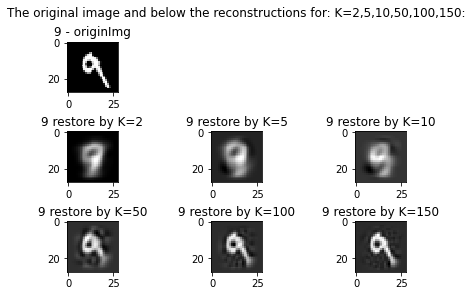

In [93]:
# creates a figure and subplots with 3 rows and 3 columns:
# in the first row the original image that I chose and below the 
# reconstration of the image for K=2, K=5, K=10, K=50, K=100, K=150
# (I used constrained_layout=True in order to separate the subPlots s.t. they do not overllaped)
figure, plots = plt.subplots(3, 3, constrained_layout=True)
# sets the title of the figure
figure.suptitle('The original image and below the reconstructions for: K=2,5,10,50,100,150:')
# get all the labels and images of the train set and test set
# the index of the original image that I chose
indexOfOriginalImage = 7
titleOfOriginalmage = str(y_test[indexOfOriginalImage]) + ' - originImg'
notReshapedImOfOriginalImage = x_test[indexOfOriginalImage]
# we have: K=2, K=5, K=10, K=50, K=100, K=150,
# for every nComponents I will display the PCA rev transform
kList = [2, 5, 10, 50, 100, 150]
kListLength = len(kList)
reconstructionTitlesList = [''] * kListLength # intializes titels list to empty strings
reconstructionImagesList = [None] * kListLength # intializes images list to None
indexOfLists = 0
for nComponent in kList:
    pca = PCA(n_components=nComponent)
    pca.fit(x_train)
    xTestAfterTransform = pca.transform(x_test)
    xTestCurr = pca.inverse_transform(xTestAfterTransform)
    reconstructionTitlesList[indexOfLists] = str(y_test[indexOfOriginalImage]) + " restore by K=" + str(nComponent)
    reconstructionImagesList[indexOfLists] = xTestCurr[indexOfOriginalImage]
    indexOfLists += 1
# plots original image and below of it the 6 reconstrations of the image for K=2, K=5, K=10, K=50, K=100, K=150
indexOfLists = 0
for rowIndex in range(3):
    for colIndex in range(3):
        isOriginalImage = rowIndex == 0 and colIndex == 0
        isReconstrcution = rowIndex > 0
        # sets the title and notReshapedIm
        if (isOriginalImage):
            title = titleOfOriginalmage
            notReshapedIm = notReshapedImOfOriginalImage
        elif (isReconstrcution):
            title = reconstructionTitlesList[indexOfLists]
            notReshapedIm = reconstructionImagesList[indexOfLists]
            indexOfLists += 1
        else:
            # hide the redundant subPlot
            plots[rowIndex, colIndex].set_visible(not plt.gcf().get_visible())
        # sets the title and show the plot in case of originalImage or reconstrcution
        if (isOriginalImage or isReconstrcution):
            reshapedIm = notReshapedIm.reshape((28,28))
            plots[rowIndex, colIndex].set_title(title)
            plots[rowIndex, colIndex].imshow(reshapedIm, cmap='gray', interpolation='nearest')
# displays the figure
plt.show()

##### Q2 - g

## Part 2 - BOW